In [1]:
# !pip install pandas  #install pandas library
import pandas as pd   #load pandas library

In [43]:
#path for read_csv can read local as well as url files
titanic = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/titanic.csv")

In [5]:
type(titanic)

pandas.core.frame.DataFrame

In [28]:
titanic['age'].describe() #statistics properties of age column in titanic DF (quantitative variables)
titanic['pclass'].value_counts() #value_counts() is used for categorical variables


3    709
1    323
2    277
Name: pclass, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

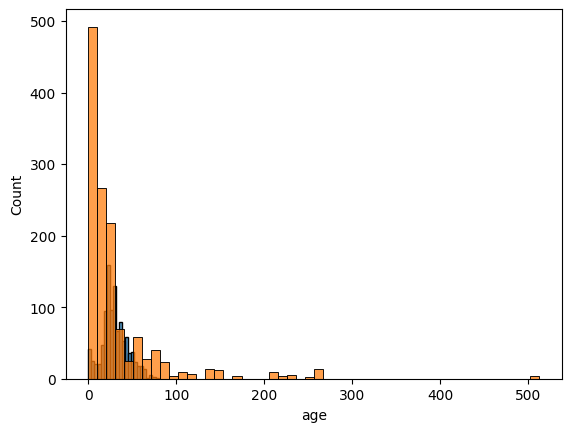

In [15]:
import seaborn as sns
sns.histplot(titanic['age'])
# titanic['age'].plot

sns.histplot(titanic['fare'], bins = 50)

In [29]:
titanic['survived'].info()
titanic['survived'].value_counts()


<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: survived
Non-Null Count  Dtype
--------------  -----
1309 non-null   int64
dtypes: int64(1)
memory usage: 10.4 KB


0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

In [30]:
titanic['parch'].value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

In [33]:
titanic.index   #get row count
titanic.columns #get columns


RangeIndex(start=0, stop=1309, step=1)

In [38]:
titanic['age'].isna().sum()     #return sum of null values for age column
titanic['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [47]:
titanic['age'].mean()
titanic['age'].isna().sum()

263

In [49]:
titanic['age'].fillna(titanic['age'].mean())

0       29.000000
1        0.920000
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881138
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

In [50]:
titanic['age'].mean()
titanic['age'].isna().sum()

263

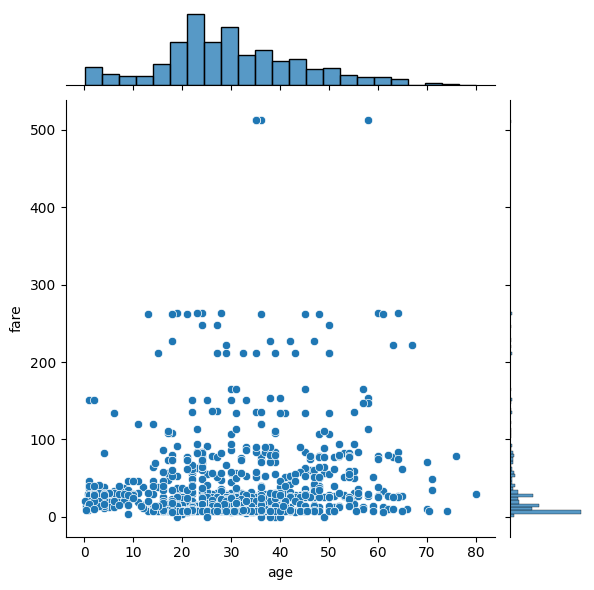

In [51]:
sns.jointplot(data=titanic, x="age", y="fare")

In [ ]:
sns.jointplot(data=titanic, x="pclass", y="fare")

In [54]:
titanic.sort_values(by="age") #sort dataframe by age, default order is ascendingtitanic.sort_values(by="age")
titanic.sort_values(by="age", ascending=False) #sort table in descending order

titanic.sort_values(by=["age", "fare"], ascending=False) #sort by two variables, age and fare

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,NaN,NaN,Belfast
473,2,0,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,NaN,NaN,Belfast
528,2,0,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,NaN,NaN,Belfast


In [57]:
titanic.groupby(['pclass','survived']).count() #find count of people grouped by pclass and survived

name  sex  age  sibsp  parch  ticket  fare  cabin  embarked  \
pclass survived                                                                
1      0          123  123  103    123    123     123   123     89       123   
       1          200  200  181    200    200     200   200    167       198   
2      0          158  158  146    158    158     158   158      6       158   
       1          119  119  115    119    119     119   119     17       119   
3      0          528  528  370    528    528     528   527      7       528   
       1          181  181  131    181    181     181   181      9       181   

                 boat  body  home.dest  
pclass survived                         
1      0            2    35        114  
       1          199     0        175  
2      0            1    31        144  
       1          111     0        117  
3      0            6    55        140  
       1          167     0         55

In [58]:
titanic.groupby(['pclass']).mean() #find mean of variables grouped by pclass

<ipython-input-58-5f7a5f7379b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby(['pclass']).mean() #find


,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [68]:
#create a function to re-categorize age
def createAgeRange(age):
  if (age <= 30):
      ageRange = "Young"
  elif ((age > 30) and (age <= 60)):
    ageRange = "Middle-Aged"
  else:
    ageRange = "Old"

  return ageRange

In [69]:
titanic['age_cat'] = titanic['age'].apply(createAgeRange) #apply the createAgeRange function to the age variable
titanic['age_cat'].value_counts()

Young          609
Middle-Aged    404
Old            296
Name: age_cat, dtype: int64

In [66]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",None
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",None
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",None
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",None
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",None


In [70]:
car_sales = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/Car_sales.csv")

In [71]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [90]:
#Give a breakdown of count of models grouped by manufacturer. Sort your answer in decreasing order of count of models

car_sales[['Model', 'Manufacturer']].groupby(['Manufacturer']).count().sort_values("Model", ascending = False)

,Model
Manufacturer,
Dodge,11
Ford,11
Mercedes-B,9
Toyota,9
Chevrolet,9
Nissan,7
Chrysler,7
Mitsubishi,7
Volvo,6


In [89]:
#Find the most expensive car for each manufacturer

car_sales[['Manufacturer', 'Price_in_thousands']].groupby(['Manufacturer']).max().sort_values(by="Price_in_thousands", ascending=False)

,Price_in_thousands
Manufacturer,
Mercedes-B,85.500
Porsche,74.970
Dodge,69.725
Audi,62.000
Lexus,60.105
Toyota,51.728
Cadillac,46.225
Chevrolet,45.705
Volvo,45.500


In [85]:
#Find average fuel_efficiency for each vehicle_type
car_sales[['Vehicle_type', 'Fuel_efficiency']].groupby('Vehicle_type').mean()

,Fuel_efficiency
Vehicle_type,
Car,19.700000
Passenger,25.298246


In [86]:
#Using the columns Price_in_thousands and Sales_in_thousands, create a new column called Total_Revenue_in_thousands

car_sales['Total_Revenue_in_thousands'] = car_sales['Price_in_thousands']* car_sales['Sales_in_thousands']

In [87]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Total_Revenue_in_thousands
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,363.75850
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,1118.50560
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,360.69600
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,489.32403
